# Astr400B Homework 7 
Rixin Li & G . Besla

Student:Yuxuan Chen
Date:04/03/2020

In [1]:
# import necessary modules
# numpy provides powerful multi-dimensional arrays to hold and manipulate data
import numpy as np
# matplotlib provides powerful functions for plotting figures
import matplotlib.pyplot as plt
# astropy provides unit system and constants for astronomical calculations
import astropy.units as u
import astropy.constants as const
# import Latex module so we can display the results with symbols
from IPython.display import Latex
%matplotlib inline

# **** import CenterOfMass to determine the COM pos/vel of M33
from CenterOfMass2 import CenterOfMass

# **** import the GalaxyMass to determine the mass of M31 for each component
from GalaxyMass import ComponentMass

MW halo Mass: 1.975 x 10^12 Msun
MW disk Mass: 0.075 x 10^12 Msun
MW bulge Mass: 0.010 x 10^12 Msun
Total MW Mass: 2.060 x 10^12 Msun
M31 halo Mass: 1.921 x 10^12 Msun
M31 disk Mass: 0.120 x 10^12 Msun
M31 bulge Mass: 0.019 x 10^12 Msun
Total M31 Mass: 2.060 x 10^12 Msun
M33 halo Mass: 0.187 x 10^12 Msun
M33 disk Mass: 0.009 x 10^12 Msun
Total M33 Mass: 0.196 x 10^12 Msun
Total Local Group Mass: 4.316 x 10^12 Msun


# M33AnalyticOrbit

In [18]:
class M33AnalyticOrbit:
    """ Calculate the analytical orbit of M33 around M31 """
    
    def __init__(self, filename): # **** add inputs
        """ Initialize the class, taking as input a filename for the file in which
            we will store the integrated orbit. At the beginning of the class, we will
            initialize those quantities: 
            through self.x, self.y,self.z related to M33 and M31, disk particles from HW4
            through self.vx, self.vy, self.vz related to M33 and M31, from HW4
            through self.disk, bulge, halo, get mass&radius of disk, bulge and halo from HW3"""

        ### get the gravitational constant (the value is 4.498502151575286e-06)
        self.G = const.G.to(u.kpc**3/u.Msun/u.Gyr**2).value
        
        ### **** store the output file name  
        self.filename = filename
        
        ### get the current pos/vel of M33    
        # **** create an instance of the  CenterOfMass class for M33 
        COMofM33 = CenterOfMass('M33_000.txt',2)
              
        # **** store the position VECTOR of the M33 COM (.value to get rid of units)
        #from HW6, we have changed CenterOfMass to CenterOfMass2
        # for M33 that is stripped more, use different values for VolDec
        #Cause M33 does not have bulge as we know from last class, so the 
        #way to calculate M33 is differenct from M31 MW. So we have to set
        #the if conditions to separate MW M31 and M33
        #if the file is M31:delta = 0.1,VolDec = 2
        #if the file is M33:delta = 0.1,VolDec = 4
        #COMPofM33 = COMofM33.COM_P(0.1,4).value
        #I can not .value here, we have to use it in velocity VECTOR of the M33 COM
        COMPofM33 = COMofM33.COM_P(0.1,4)
        
        # **** store the velocity VECTOR of the M33 COM (.value to get rid of units)
        COMVofM33 = COMofM33.COM_V(COMPofM33[0],COMPofM33[1],COMPofM33[2])
        
        ### get the current pos/vel of M31 
        # **** create an instance of the  CenterOfMass class for M31 
        COMofM31 = CenterOfMass('M31_000.txt',2)

        # **** store the position VECTOR of the M31 COM (.value to get rid of units)
        COMPofM31 = COMofM31.COM_P(0.1,2)

        # **** store the velocity VECTOR of the M31 COM (.value to get rid of units)
        COMVofM31 = COMofM31.COM_V(COMPofM31[0],COMPofM31[1],COMPofM31[2])
        
        
        ### store the DIFFERENCE between the vectors posM33 - posM31
        # **** create two VECTORs self.r0 and self.v0 and have them be the
        # relative position and velocity VECTORS of M33
        self.r0 = COMPofM33.value - COMPofM31.value
        self.v0 = COMVofM33.value - COMVofM31.value
        
        ### get the mass of each component in M31 
        ### disk
        # **** self.rdisk = scale length (no units)
        #as homework7 instruction asked rdisk = 5kpc
        self.rdisk = 5 
        
        # **** self.Mdisk set with ComponentMass function. Remember to *1e12 to get the right units. 
        #not sure can I directly type the result we already get
        #if we can do this then self.
        #self.Mdisk = 0.120 * 10**12
        self.Mdisk = ComponentMass('M31_000.txt',2)*1e12
    
        ### bulge
        # **** self.rbulge = set scale length (no units)
        #as homework7 instruction asked rbulge = 5kpc
        self.rbulge = 1 

        # **** self.Mbulge  set with ComponentMass function. Remember to *1e12 to get the right units.
        #not sure can I directly type the result we already get
        #if we can do this then self.
        #self.Mbulge = 0.019 * 10**12 
        self.Mbulge = ComponentMass('M31_000.txt',1)*1e12
        
        # Halo
        # **** self.rhalo = set scazle length from HW5 (no units)
        self.rhalo = 62 

        # **** self.Mhalo set with ComponentMass function. Remember to *1e12 to get the right units. 
        #not sure can I directly type the result we already get
        #if we can do this then self.
        #self.Mhalo = 1.921 * 10**12
        self.Mhalo = ComponentMass('M31_000.txt',1)*1e12
    
    
    def HernquistAccel(self,M,ra,r):
        # it is easiest if you take as an input the position VECTOR
        #I do not know, linsten to HW7 intructions or the comment above
        #Hw7 asked to put 6 inputs, but directly use r which is the easiest
        """Here we have to calculate the hernquist acceleration
        self: I do not think I have introduce more
        M: is the bulge/halo mass we have bring into the euqation
        ra: I halo/bulge length
        r(x,y,z):the position vector we will bring into the euqation
        r[0]=x position,r[1] = y position, r[3] = z position"""
        
        ### **** Store the magnitude of the position vector
        #from the home work instruction, we now rmag is the magnitude of 3 dimensional position
        rmag = np.sqrt(r[0]**2+r[1]**2+r[2]**2)
        ### *** Store the Acceleration
        Hern =  -self.G * M/(rmag*(ra+rmag)**2)*r #follow the formula in the HW instructions
        # NOTE: we want an acceleration VECTOR so you need to make sure that in the Hernquist equation you 
        # use  -G*M/(rmag *(ra + rmag)**2) * r --> where the last r is a VECTOR 
        
        return Hern
    
    
    
    def MiyamotoNagaiAccel(self,M,rd,r):
        # it is easiest if you take as an input a position VECTOR  r 
        #I do not know, linsten to HW7 intructions or the comment above
        #Hw7 asked to put 6 inputs, but directly use r which is the easiest
        """Here we have to calculate the disk acceleration through Miyamoto profile
        self: I do not think I have introduce more
        M: is the disk mass we have bring into the euqation
        rd: is the disk length
        r(x,y,z):the position vector we will bring into the euqation
        r[0]=x position,r[1] = y position, r[3] = z position"""
        

        ### Acceleration **** follow the formula in the HW instructions
        # AGAIN note that we want a VECTOR to be returned  (see Hernquist instructions)
        # this can be tricky given that the z component is different than in the x or y directions. 
        # we can deal with this by multiplying the whole thing by an extra array that accounts for 
        zd = rd/5.0
        r_xy_mag = np.sqrt(r[0]**2+r[1]**2)
        B = rd + np.sqrt(r[2]**2+zd**2)
        potential_profile = (-self.G * M) / (r_xy_mag**2+B**2)**1.5 * r
    
        # differences in the z direction:
        #  multiply the whle thing by :   np.array([1,1,ZSTUFF]) 
        # where ZSTUFF are the terms associated with the z direction
        ZSTUFF = B/np.sqrt(r[2]**2+zd**2)
        Maya = potential_profile * np.array([1,1,ZSTUFF])


        return Maya
        # the np.array allows for a different value for the z component of the acceleration

    
    def M31Accel(self,r): 
        # input should include the position vector, r
        """M31Accel used to sum all acceleration vectors from each galaxy
        component.This function takes as input the 3D position vector(x,y,z)"""

        ### Call the previous functions for the halo, bulge and disk
        # **** these functions will take as inputs variable we defined in the initialization of the class like 
        # self.rdisk etc.
        # M31 halo acceleration
        A31_h = self.HernquistAccel(self.Mhalo,self.rhalo,r)
        # M31 bulge acceleration
        A31_b = self.HernquistAccel(self.Mbulge,self.rbulge,r)
        # M31 disk acceleration
        A31_d = self.MiyamotoNagaiAccel(self.Mdisk,self.rdisk,r)
            
            # return the SUM of the output of the acceleration functions - this will return a VECTOR 
        return A31_h + A31_d + A31_b
    
    
    
    def LeapFrog(self,dt,r,v): 
        # take as input r and v, which are VECTORS. Assume it is ONE vector at a time
        """ We have to solve the orbit of M33 by integrating the folowing equation of motion
        forwards time.In order to define a function LeapFrog. We have set
        dt: intervel for integration
        r(x,y,z): for M33 COM position relative to the M31
        v(x,y,z): starting velocity for M33 relative to M31"""
        
        # predict the position at the next half timestep
        rhalf = r + v*dt/2.0
        
        # predict the final velocity at the next timestep using the acceleration field at the rhalf position 
        vnew = v + self.M31Accel(rhalf)*dt  
        
        # predict the final position using the average of the current velocity and the final velocity
        
        rnew = r + (v + vnew)*dt/2.0
        
        return rnew, vnew # **** return the new position and velcoity vectors
    
    
    
    def OrbitIntegration(self, t0, dt, tmax):
        t= t0
        #Now we will loop over the LeapFrog integrator to solve the equation of motion
        #and compute the future orbit of M33 for 10Gyr into the future
        #t_0: a starting time 
        #dt: a time interval
        #t_max: dinal time

        # initialize the time to the input starting time
        
        # initialize an empty array of size :  rows int(tmax/dt)+2  , columns 7
        orbit = np.zeros([int(tmax/dt)+2, 7])
        #I tried 5hours to run this function below.....
        #damn initial v and r from LeapFrog must be state here
        r = self.r0
        v = self.v0
        
        # initialize the first row of the orbit
        orbit[0] = t0, *tuple(self.r0), *tuple(self.v0)
        # this above is equivalent to 
        # orbit[0] = t0, self.r0[0], self.r0[1], self.r0[2], self.v0[0], self.v0[1], self.v0[2]

        # initialize a counter for the orbit.  
        i = 1 # since we already set the 0th values, we start the counter at 1
        
        # start the integration (advancing in time steps and computing LeapFrog at each step)
        while (t <= tmax):  # as long as t has not exceeded the maximal time 
            
            # **** advance the time by one timestep, dt
            t = t + dt
           
            # **** store the new time in the first column of the ith row
            orbit[i][0] = t
            
            # ***** advance the position and velocity using the LeapFrog scheme
            # remember that LeapFrog returns a position vector and a velocity vector  
            # as an example, if a function returns three vectors you would call the function and store 
            # the variable like:     a,b,c = function(input)
            rnew, vnew = self.LeapFrog(dt,r,v)
            #This row and column things..... realy need to care, real takes time to fix
            orbit[i,1] = rnew[0] 
            orbit[i,2] = rnew[1]
            orbit[i,3] = rnew[2]
            orbit[i,4] = vnew[0]
            orbit[i,5] = vnew[1]
            orbit[i,6] = vnew[2]
            i = i + 1
            r, v = rnew, vnew

        # write the data to a file
        np.savetxt(self.filename, orbit, fmt = "%11.3f"*7, comments='#', 
                   header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                   .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
        
        # there is no return function

In [22]:
M33Data = M33AnalyticOrbit("M33_Orbit.txt")

In [101]:
M33Orbit = M33Data.OrbitIntegration(0, 0.111, 10)

In [102]:
#Finally we can read our data files
#now we can get 7 series data through reading files

M31_hw6orb = np.genfromtxt('Orbit_M31.txt',dtype=None,names=True) 
M33_hw6orb = np.genfromtxt('Orbit_M33.txt',dtype=None,names=True)
M33_hw7orb = np.genfromtxt('M33_Orbit.txt',dtype=None,names=True)

In [103]:
# now we have repeat what we did in hw6 to calculate the magnitude difference
#I will just use the one from my HW6
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit
#MODG stands for magnitude of the difference between two vectors(Galaxy)
#G1e1 means data/set of Galaxy 1's element 1
#G2e1 means data/set of Galaxy 2's element 1
#The same goes for G1e2,G2e2,G1e3.G2e3
def MODG(G1e1, G2e1, G1e2, G2e2, G1e3, G2e3):  
    #inputs:G1e1, G2e1, G1e2, G2e2, G1e3, G2e3
    #return the magnitude of the difference between two vectors 
    return np.sqrt((G1e1 - G2e1)**2 + (G1e2 - G2e2)**2 + (G1e3 - G2e3)**2 )

In [104]:
# Determine the magnitude of the relative position and velocities 
#Use the fucntion we have defined above
#PM_MW_31 means position magnitude between MW and M31
#VM_MW_31 means velocities magnitude between MW and M31
#G1e1 means data/set of Galaxy 1's element 1
#G2e1 means data/set of Galaxy 2's element 1
#G3e1 means data/set of Galaxy 3's element 1
#The same goes for others
G1e1 = M31_hw6orb['x']
G1e2 = M31_hw6orb['y']
G1e3 = M31_hw6orb['z']
G2e1 = M33_hw6orb['x']
G2e2 = M33_hw6orb['y']
G2e3 = M33_hw6orb['z']

G1e4 = M31_hw6orb['vx']
G1e5 = M31_hw6orb['vy']
G1e6 = M31_hw6orb['vz']
G2e4 = M33_hw6orb['vx']
G2e5 = M33_hw6orb['vy']
G2e6 = M33_hw6orb['vz']
#PM_M31_33 means position magnitude between M31 and M33
#VM_M31_33 means velocities magnitude between M31 and M33
PM_M31_M33 = MODG(G1e1, G2e1, G1e2, G2e2, G1e3, G2e3)
VM_M31_M33 = MODG(G1e4, G2e4, G1e5, G2e5, G1e6, G2e6)

In [105]:
#Now we can calculate the magnitude of the relative position and velocities from HW7's
M31M33_PMHW7 = np.sqrt(M33_hw7orb['x']**2+M33_hw7orb['y']**2+M33_hw7orb['z']**2)
M31M33_VMHW7 = np.sqrt(M33_hw7orb['vx']**2+M33_hw7orb['vy']**2+M33_hw7orb['vz']**2)

Text(0.5, 1.0, 'M31&M33, time vs separation Plot')

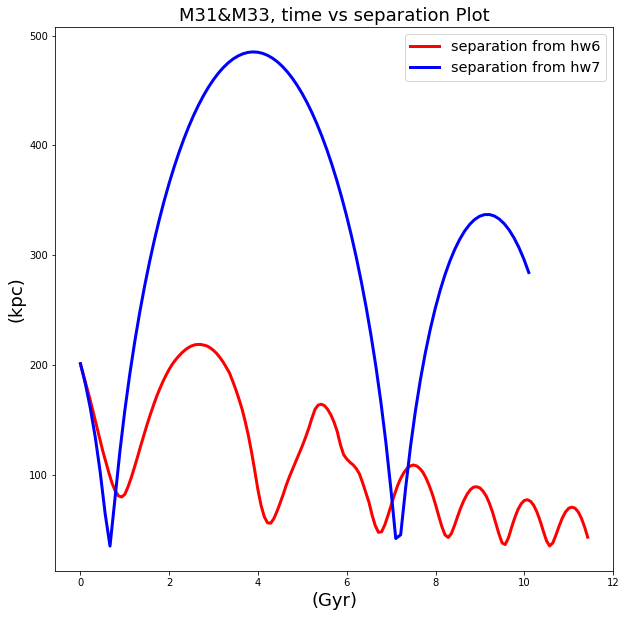

In [106]:
#Plot the hw7vshw6 in position different
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
plt.plot(M31_hw6orb['t'],PM_M31_M33,'r',linewidth=3,label='separation from hw6')
plt.plot(M33_hw7orb['t'],M31M33_PMHW7,'b',linewidth=3,label='separation from hw7')

# Add axis labels
plt.xlabel('Time (Gyr)',fontsize=22)
plt.ylabel('Separation (kpc)',fontsize=22)

#x lable is time
#y label is separation
plt.xlabel('(Gyr)',fontsize = 18)
plt.ylabel('(kpc)',fontsize = 18)
legend = ax.legend(loc='best',fontsize='x-large')
plt.title('M31&M33, time vs separation Plot',fontsize=18)

Text(0.5, 1.0, 'M31&M33, time vs relative velocity Plot')

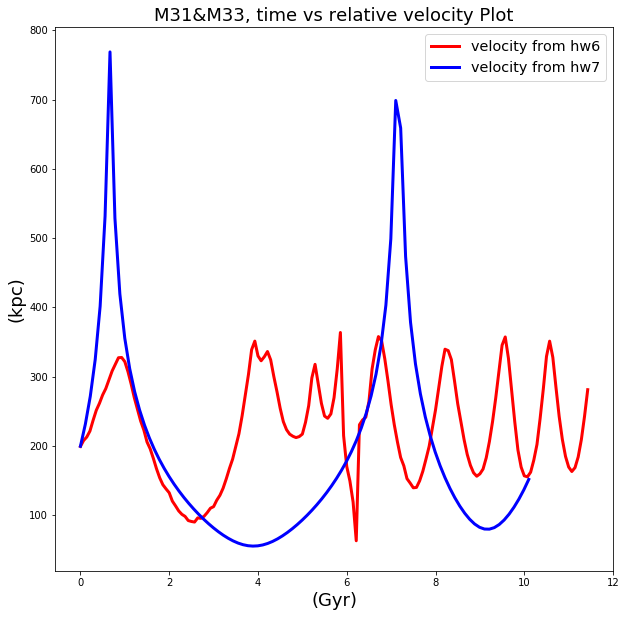

In [107]:
#Plot the hw7vshw6 in velocities different
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
plt.plot(M31_hw6orb['t'],VM_M31_M33,'r',linewidth=3,label='velocity from hw6')
plt.plot(M33_hw7orb['t'],M31M33_VMHW7,'b',linewidth=3,label='velocity from hw7')

# Add axis labels
plt.xlabel('Time (Gyr)',fontsize=22)
plt.ylabel('relative speed (km/s)',fontsize=22)

#x lable is time
#y label is separation
plt.xlabel('(Gyr)',fontsize = 18)
plt.ylabel('(kpc)',fontsize = 18)
legend = ax.legend(loc='best',fontsize='x-large')
plt.title('M31&M33, time vs relative velocity Plot',fontsize=18)

In [108]:
#2. Those plot are different, from Homework 6, 
#the separation and velocities compared with time, which is
# tend to decreasing, but the graph is not smooth.The slopes of graph
#from hw6 is no specific rules. However for HW7, it follow the rules to
#decreasing.

In [109]:
#3. As we know. MW is also close to those to galaxies.
#so we might forgot the impact of mutiply bodies of 
#gravitational force. And the impact casued by
#streams in space. So those effects might make our
#result much different.

In [ ]:
#4. Well even MW is missing in these calculations. But MW is there for tons of years.
#The data we get from obervation, which might already impacted from MW. I mean the 
#acceleration due to efffect of gravitational force of MW, is already counted in
#M31, so it does not matter we missing MW calculation or not